- Reference: https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/
- Dataset: https://www.kaggle.com/datasets/tarunbisht11/yolo-animal-detection-small?resource=download

> This dataset contains images and labels of Monkeys, Cats, and Dogs.


In [25]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [64]:
from ultralytics import YOLO
from IPython.display import Image
import csv
import os
import glob

Dataset: https://www.kaggle.com/datasets/tarunbisht11/yolo-animal-detection-small?resource=download

In [44]:
# Create labels for train and val

# Create a dictionary to store image data
image_data = {}

# Define a dictionary to map class names to IDs
class_ids = {"monkey": 0, "cat": 1, "dog": 2}

def make_labels_txt(csv_file):

    # Create labels folder
    os.makedirs(f'data/{csv_file}/labels', exist_ok=True)

    # Open the CSV file
    with open(f'data/{csv_file}.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)    
        next(reader)  # Skip the header row
        for row in reader:
            filename, img_width, img_height, class_name, xmin, ymin, xmax, ymax = row

            # Calculate the center, width and height of the bounding box
            x_center = (float(xmin) + float(xmax)) / 2 / float(img_width)
            y_center = (float(ymin) + float(ymax)) / 2 / float(img_height)
            width = (float(xmax) - float(xmin)) / float(img_width)
            height = (float(ymax) - float(ymin)) / float(img_height)

            # Get the class_id from the dictionary
            class_id = class_ids[class_name]

            # Add the data to the dictionary
            if filename in image_data:
                image_data[filename].append([class_id, x_center, y_center, width, height])
            else:
                image_data[filename] = [[class_id, x_center, y_center, width, height]]

    # Write the data to text files
    for filename, boxes in image_data.items():
        with open(os.path.join(f'data/{csv_file}/labels', f'{os.path.splitext(filename)[0]}.txt'), 'w') as file:
                for box in boxes:
                    file.write(' '.join(map(str, box)) + '\n')

In [45]:
# Make labels for train data
make_labels_txt("train")

# Make labels for val data
make_labels_txt("val")

In [47]:
# Open the file and print its contents
with open('data/train/labels/cats_and_monkeys_001.txt', 'r') as file:
    print(file.read())

1 0.5822784810126582 0.7894736842105263 0.5569620253164557 0.41353383458646614
0 0.7120253164556962 0.4116541353383459 0.5759493670886076 0.7556390977443609



In [48]:
# Open the file and print its contents
with open('data/val/labels/cats_and_monkeys_000.txt', 'r') as file:
    print(file.read())

1 0.540084388185654 0.6105341246290801 0.8818565400843882 0.6068249258160238
0 0.45569620253164556 0.5178041543026706 0.9071729957805907 0.913946587537092



In [49]:
# YOLO v8
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 54.5MB/s]


In [54]:

def remove_xml_files(folder):
    # Specify the pattern for XML files
    pattern = f"data/{folder}/images/*.xml"

    # Get a list of all XML files
    xml_files = glob.glob(pattern)

    # Remove all XML files
    for xml_file in xml_files:
        os.remove(xml_file)

In [56]:
remove_xml_files('train')

In [57]:
remove_xml_files('val')

In [61]:
model.train(data="data.yaml", epochs=5)

Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=5, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format

train: Scanning /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/data/train/labels.cache... 469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 469/469 [00:00<?, ?it/s]
val: Scanning /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/data/val/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]

Plotting labels to runs/detect/train7/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


/Users/nguyenvietthai/miniconda3/envs/computer-vision/lib/python3.9/site-packages/torch/nn/functional.py:2443: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if size_prods == 1:


5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.128      1.796      1.425         29        640: 100%|██████████| 30/30 [04:03<00:00,  8.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.12s/it]

                   all         51        113      0.647      0.339      0.419       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.015      1.632      1.357         24        640: 100%|██████████| 30/30 [04:03<00:00,  8.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.93s/it]

                   all         51        113      0.503      0.572      0.519      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.037      1.584       1.36         19        640: 100%|██████████| 30/30 [04:02<00:00,  8.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.26s/it]

                   all         51        113      0.694      0.614      0.676      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.006      1.486      1.352         33        640: 100%|██████████| 30/30 [04:07<00:00,  8.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.94s/it]

                   all         51        113       0.54      0.553      0.559      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        5/5         0G     0.9712      1.413      1.312         28        640: 100%|██████████| 30/30 [04:00<00:00,  8.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]

                   all         51        113      0.649      0.498      0.549      0.377



5 epochs completed in 0.353 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.58s/it]


                   all         51        113      0.694      0.614      0.675      0.462
                monkey         51         43      0.435      0.581      0.567      0.402
                   cat         51         40      0.742      0.625      0.619      0.405
                   dog         51         30      0.905      0.637       0.84      0.578
Speed: 1.5ms preprocess, 172.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x2ae4b0190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [62]:
model.export(format='onnx')

Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train7/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 43.3 MB/s eta 0:00:0000:0100:01

requirements: AutoUpdate success ✅ 3.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 5.0s, saved as 'runs/detect/train7/weights/best.onnx' (11.7 MB)

Export complete (5.4s)
Results saved to /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/runs/detect/train7/weights
Predict:         yolo predict task=detect 

'runs/detect/train7/weights/best.onnx'

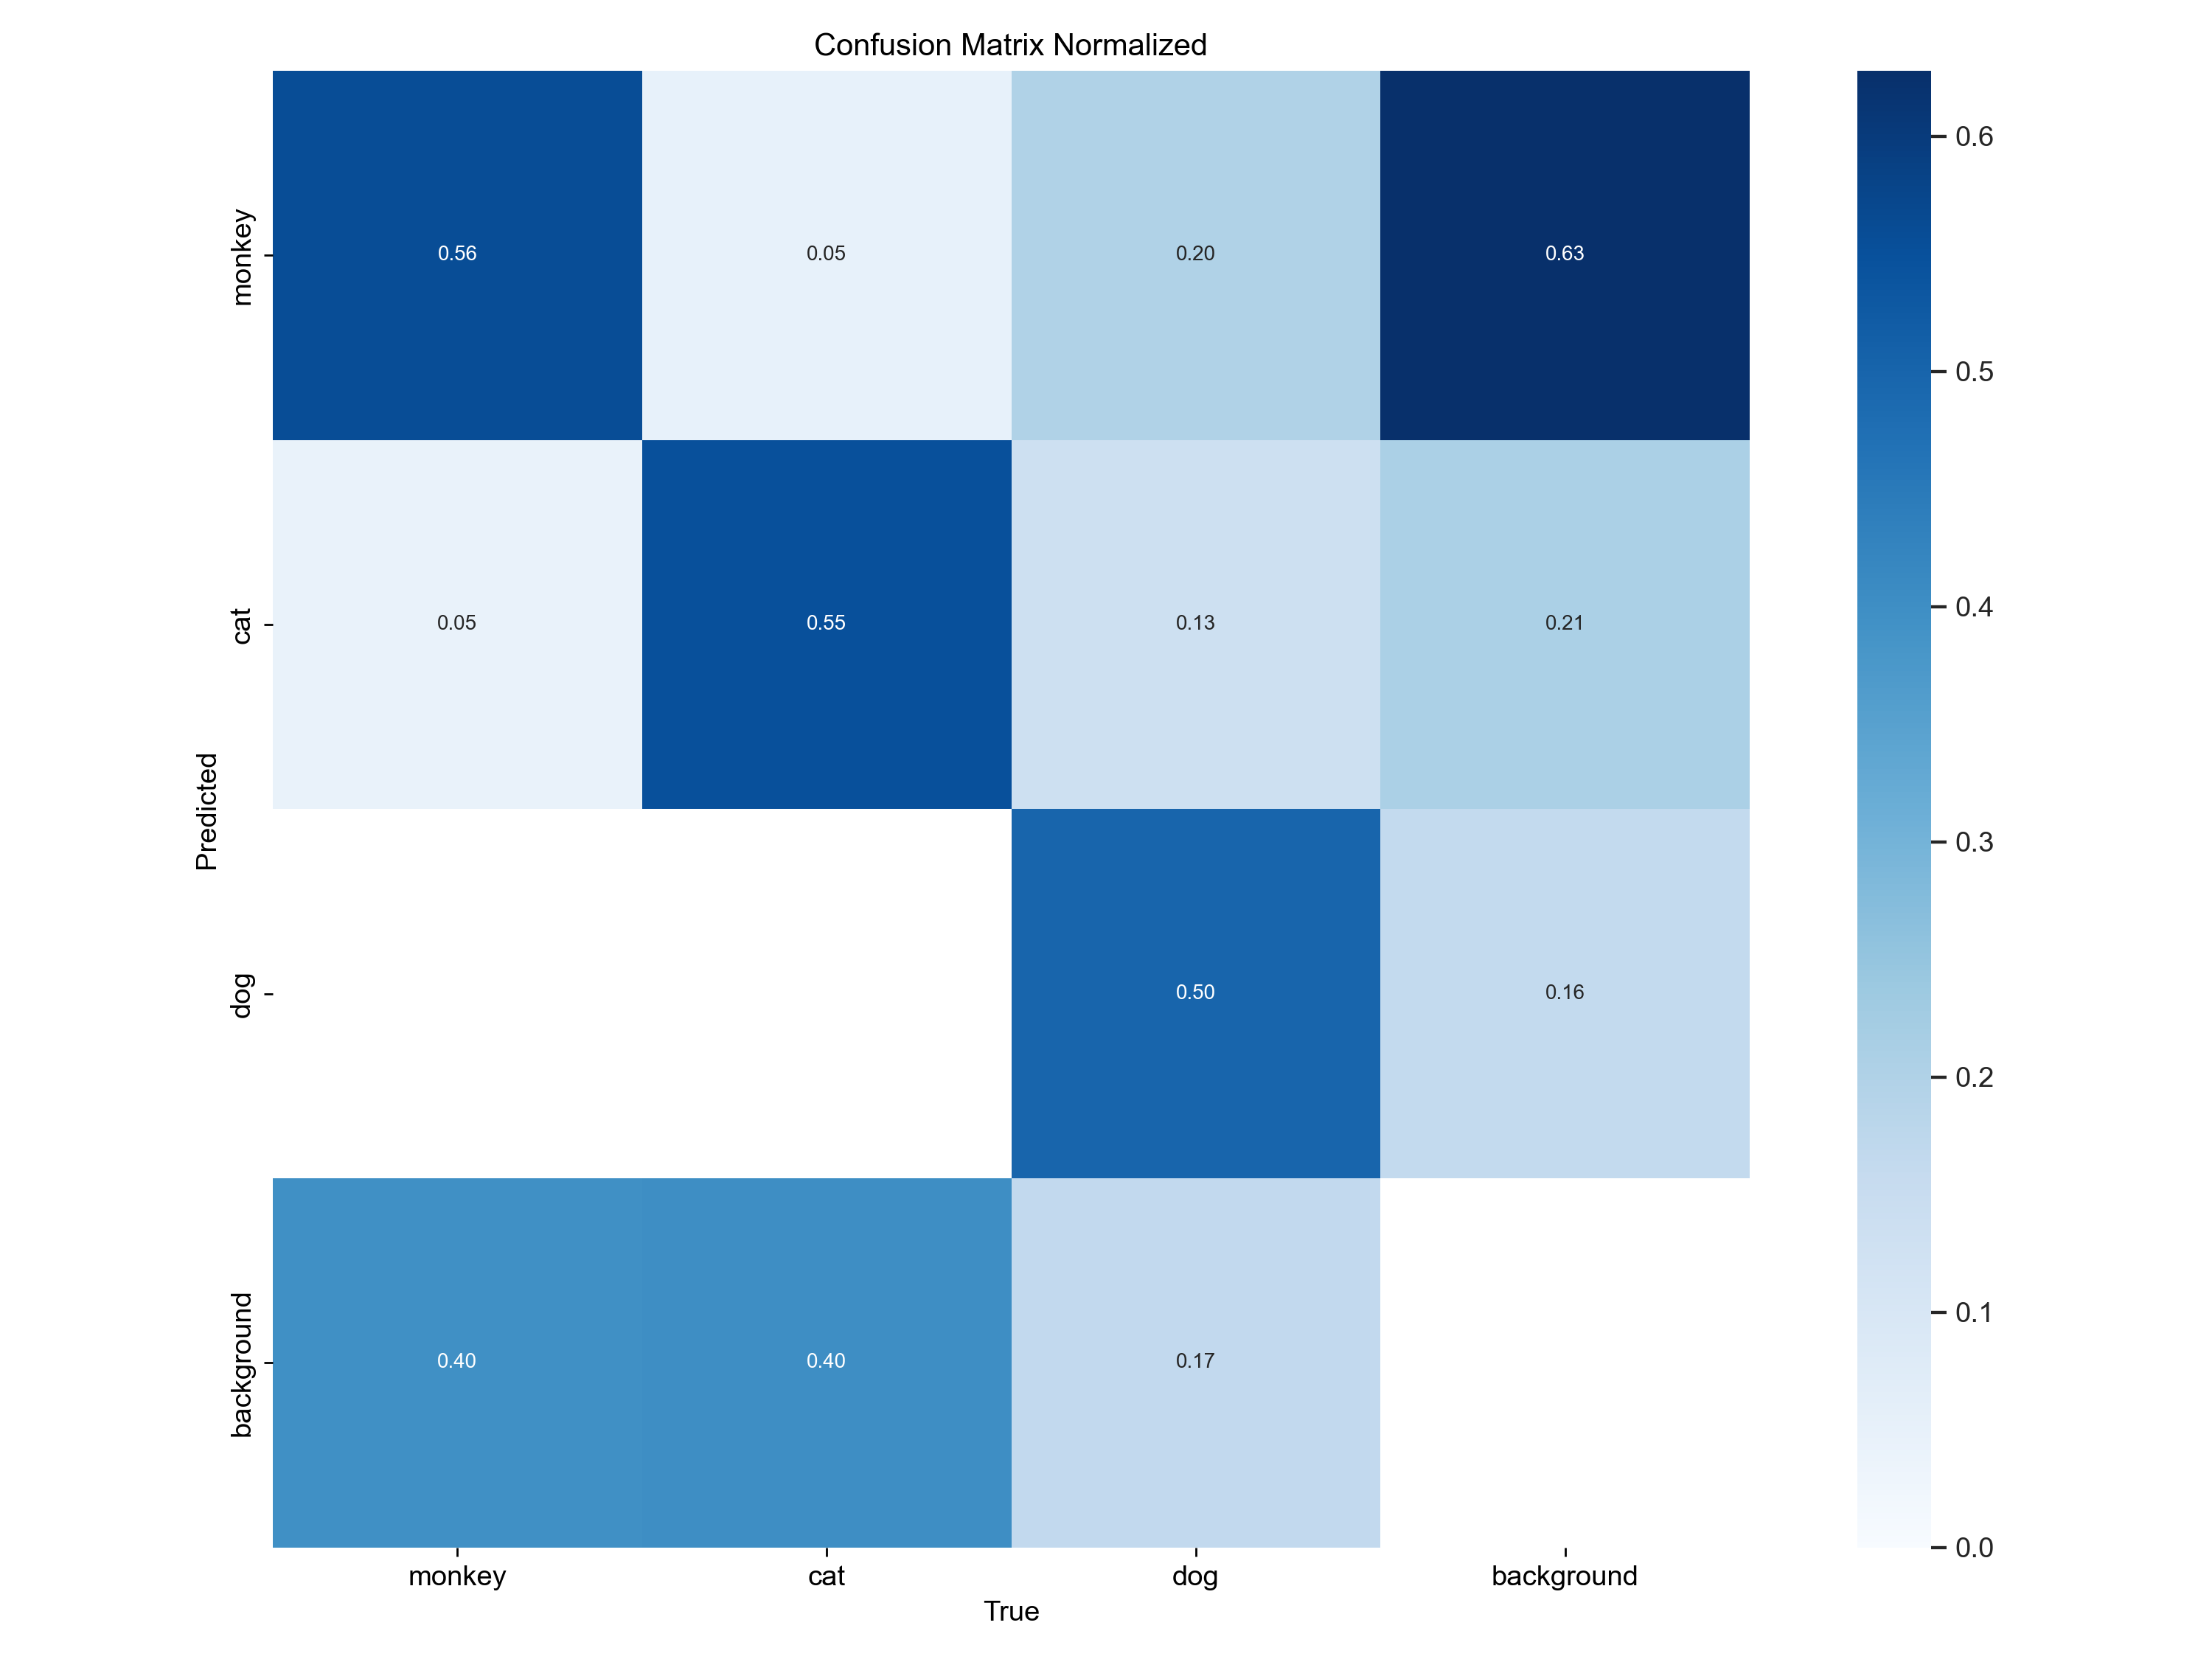

In [68]:
# Confusion matrix
Image('runs/detect/train7/confusion_matrix_normalized.png', width=800)

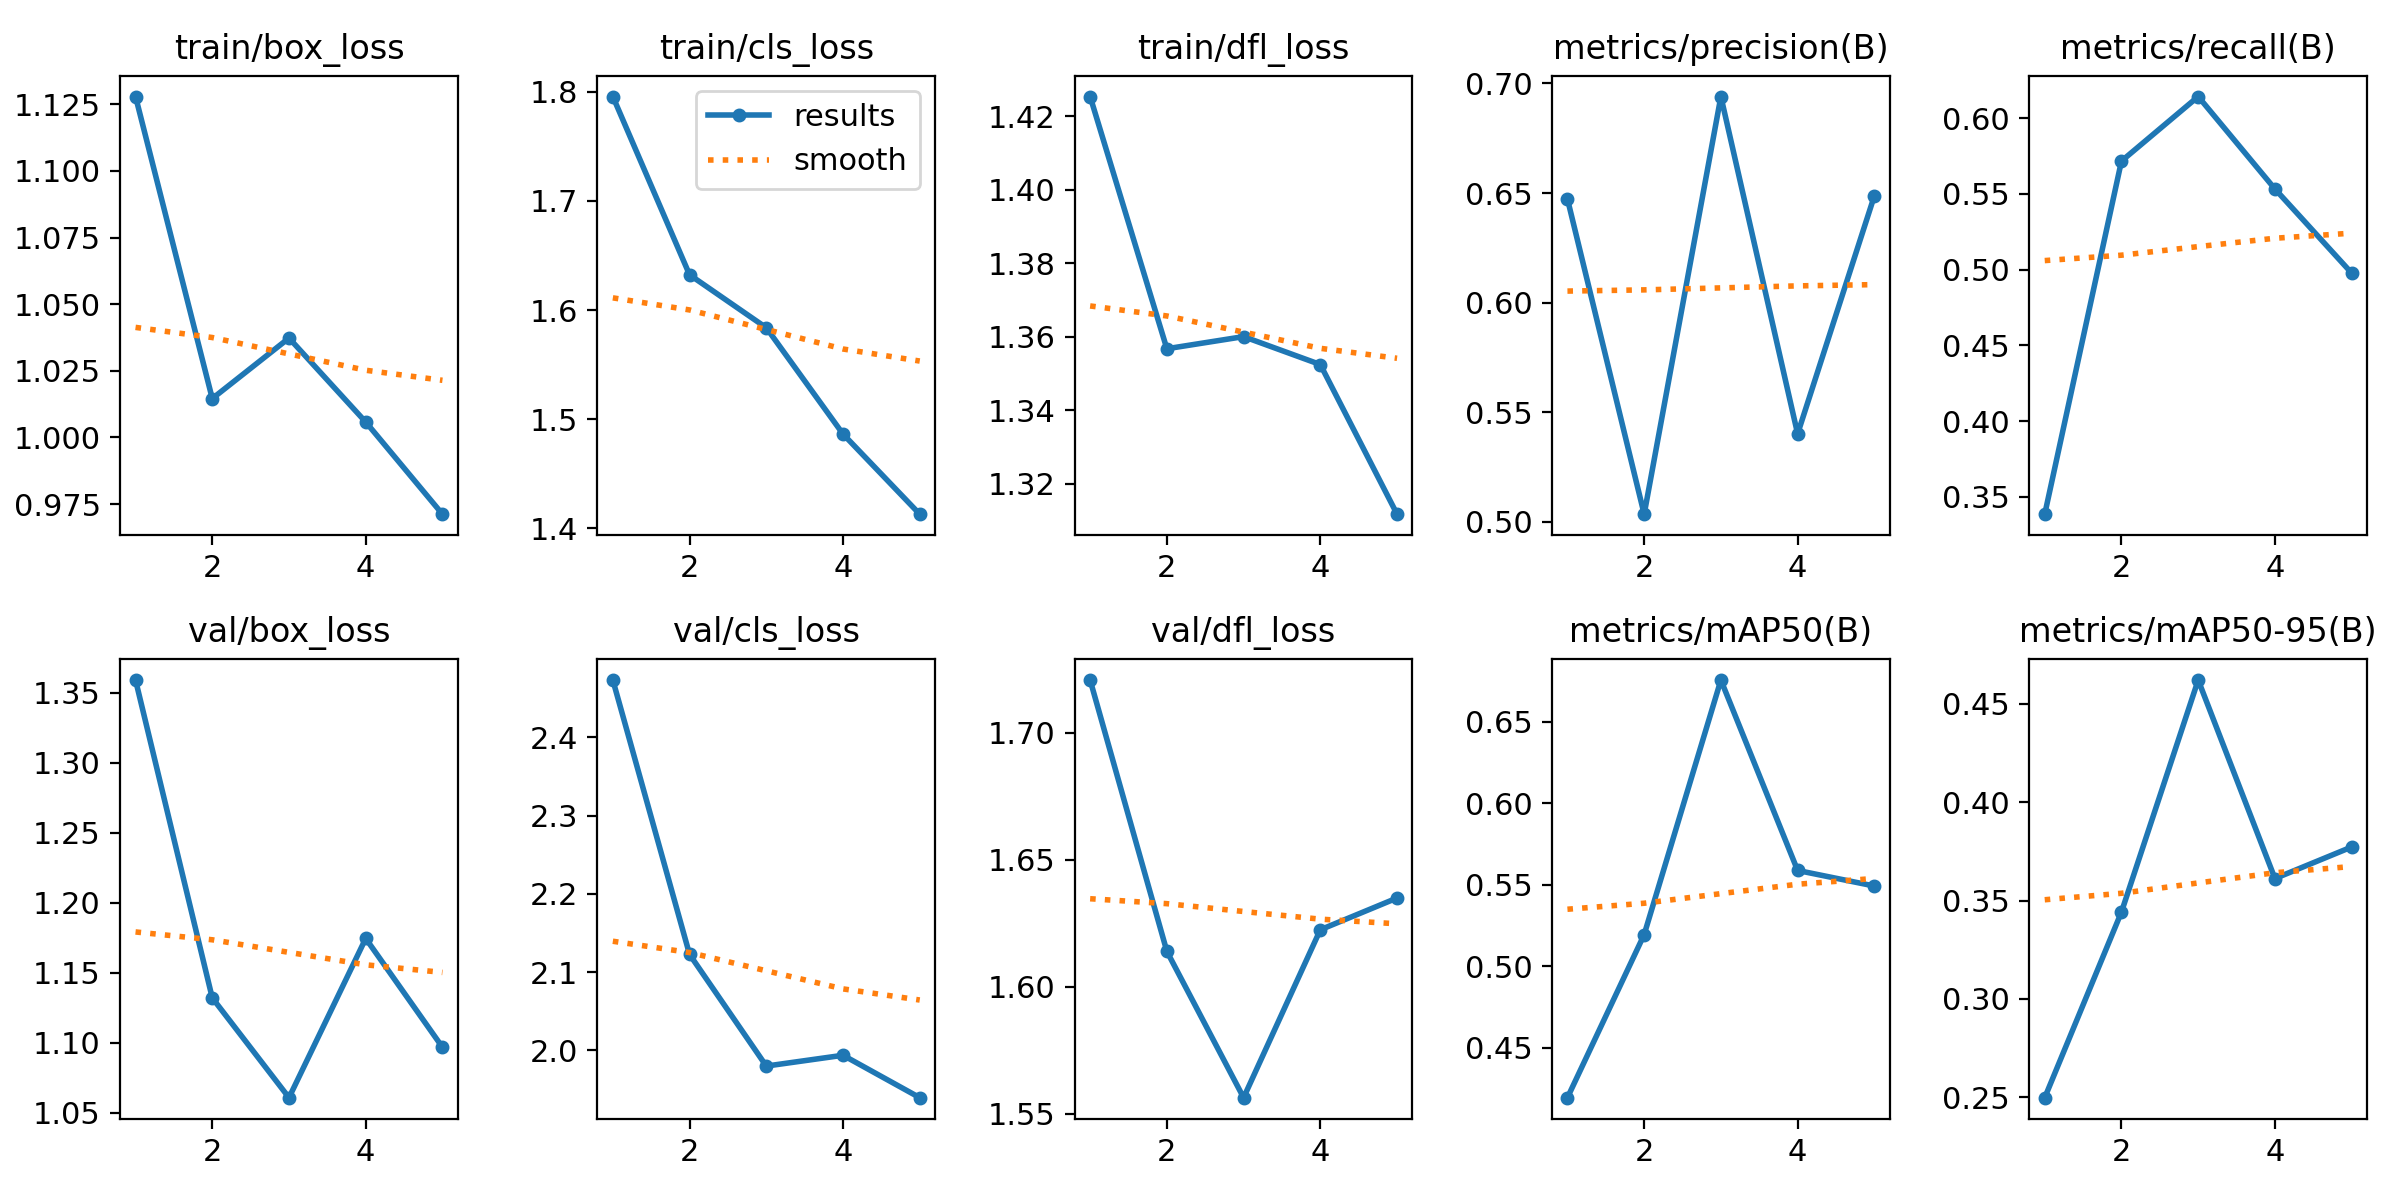

In [69]:
# Results
Image('runs/detect/train7/results.png', width=800)

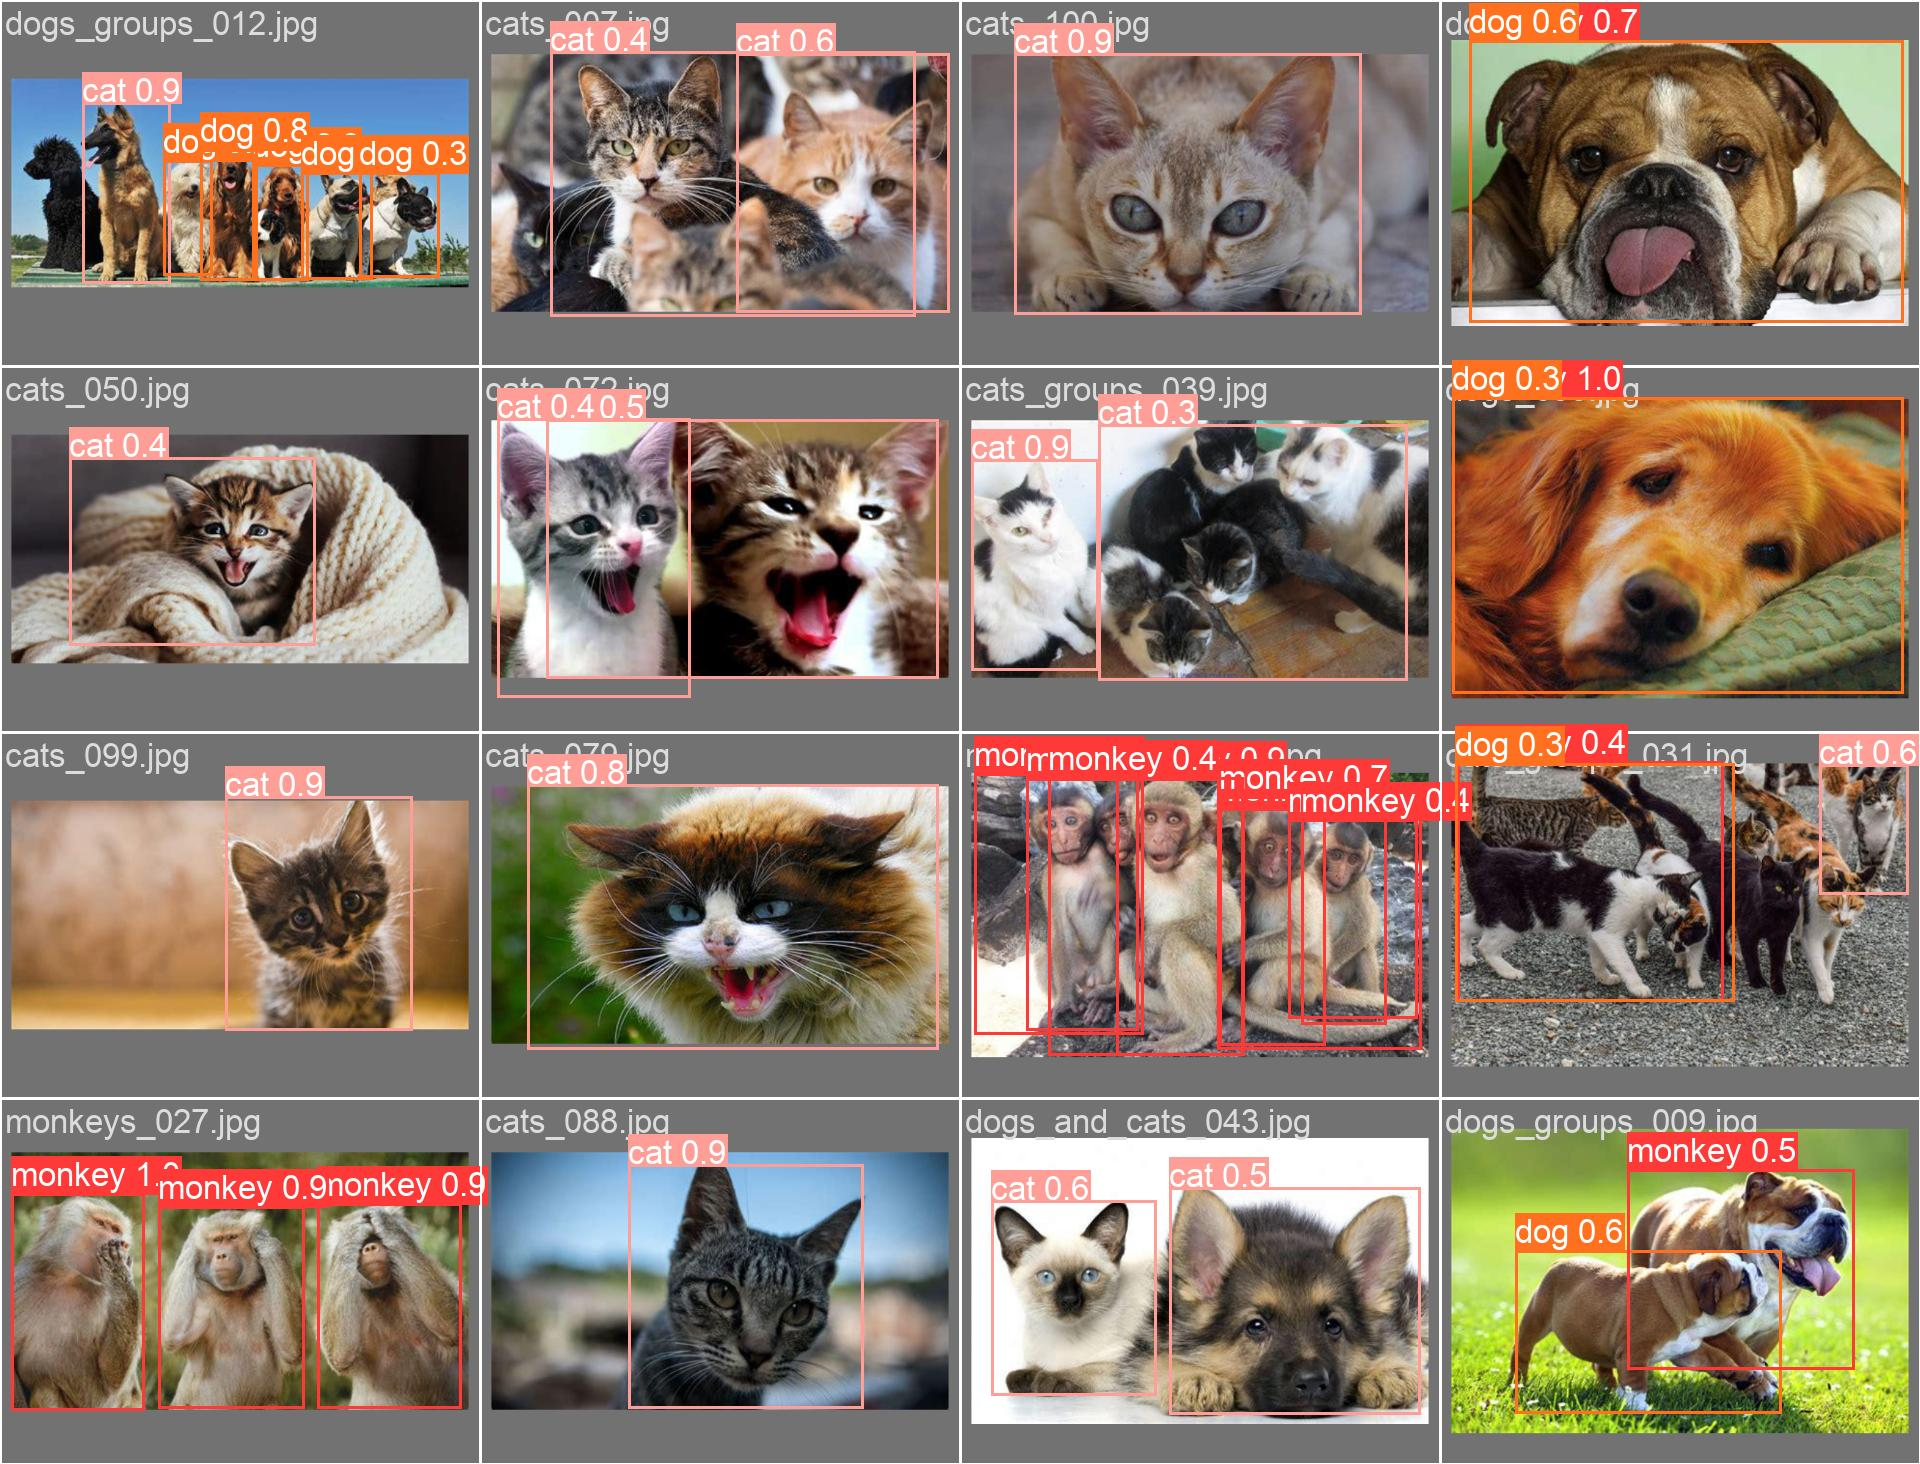

In [74]:
# Show predictions
Image('runs/detect/train7/val_batch0_pred.jpg', width=800)
